## **Knowledge Graph Generation**
*Author : Alok Prasad, alokp650@gmail.com*





### **Information extraction from unstructured text**
It is a technique of extracting structured information from unstructured text. This means taking a raw text and processing it in such way that we can extract information from it in a format that a computer understands and can use. This is a very difficult problem in NLP because human language is so complex and lots of words can have a different meaning when we put it in a different context.

### **Knowledge Graphs**
It is a way of storing data that resulted from an information extraction task. Many basic implementations of knowledge graphs make use of a concept we call SPO triples, that is a set of three items(a subject, a predicate and an object) that we can use to store information about something.


**Task 1:** Visit the following Wikipedia page: https://en.wikipedia.org/wiki/Paracetamol
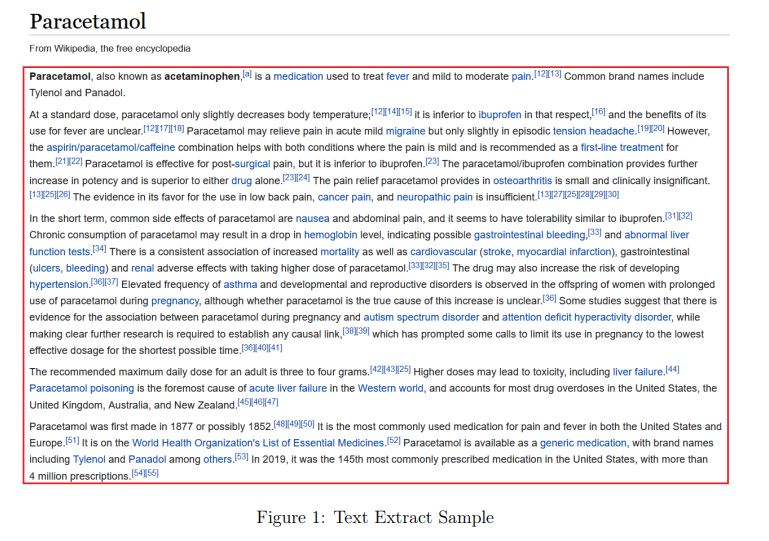

**Task 2:** Create a knowledge graph from the text extract (boxed in Red) shown in Figure 1.

**Deliverable:**

*   List of extracted triples in the form of:
    * (subject, predicate, object) OR (source, relation, target)
    *   Example: \\
    [(“paracetamol”, “medication”, “fever”),(“common brand names”, “include”, “tylenol”), ...]
*   A graph visualization




## **Implementation**


1.   Import the required dependencies,i.e.,
      *   spacy
      *   networkx
      *   matplotlib
      *   pandas
      *   !python -m spacy download en_core_web_lg
      
2.   Use spaCy to split the text in sentences.

3.   For each sentence, use spaCy to figure out what kind of word is every word in that sentence: is it a subject, an object, a predicate and so on.

4.   Figure out where in the triple we should put a word.

5.   Finally build the triples

6.   Build and show the knowledge graph

## **CODE**


In [20]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def getSentences(text):
    nlp = English()
    nlp.add_pipe('sentencizer')
    document = nlp(text)
    return [sent.text.strip() for sent in document.sents]

def printToken(token):
    print(token.text, "--->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        # printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''
    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G, k=0.5)
    plt.figure(4,figsize=(20,20)) 
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=600, node_color='lightblue', alpha=1,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.savefig("knowledge_graph.png")
    plt.show()

In [23]:
    if __name__ == "__main__":
      text = "Paracetamol, also known as acetaminophen, is a medication used to treat fever and mild to moderate pain."\
           "Common brand names include Tylenol and Panadol.At a standard dose, paracetamol only slightly decreases body temperature;"\
           "it is inferior to ibuprofen in that respect, and the benefits of its use for fever are unclear."\
           "Paracetamol may relieve pain in acute mild migraine but only slightly in episodic tension headache."\
           "However, the aspirin/paracetamol/caffeine combination helps with both conditions where the pain is mild"\
           "and is recommended as a first-line treatment for them. Paracetamol is effective for post-surgical pain,"\
           "but it is inferior to ibuprofen. The paracetamol/ibuprofen combination provides further increase in potency"\
           "and is superior to either drug alone. The pain relief paracetamol provides in osteoarthritis is small and clinically insignificant."\
           "The evidence in its favor for the use in low back pain, cancer pain, and neuropathic pain is insufficient."\
           "In the short term, common side effects of paracetamol are nausea and abdominal pain,"\
           "and it seems to have tolerability similar to ibuprofen. Chronic consumption of paracetamol may result in a drop in hemoglobin level,"\
           "indicating possible gastrointestinal bleeding, and abnormal liver function tests."\
           "There is a consistent association of increased mortality as well as cardiovascular (stroke, myocardial infarction),"\
           "gastrointestinal (ulcers, bleeding) and renal adverse effects with taking higher dose of paracetamol."\
           "The drug may also increase the risk of developing hypertension. Elevated frequency of asthma and developmental"\
           "and reproductive disorders is observed in the offspring of women with prolonged use of paracetamol during pregnancy,"\
           "although whether paracetamol is the true cause of this increase is unclear."\
           "Some studies suggest that there is evidence for the association between paracetamol during pregnancy and autism spectrum disorder"\
           "and attention deficit hyperactivity disorder, while making clear further research is required to establish any causal link,"\
           "which has prompted some calls to limit its use in pregnancy to the lowest effective dosage for the shortest possible time."\
           "The recommended maximum daily dose for an adult is three to four grams. Higher doses may lead to toxicity, including liver failure."\
           "Paracetamol poisoning is the foremost cause of acute liver failure in the Western world,"\
           "and accounts for most drug overdoses in the United States, the United Kingdom, Australia, and New Zealand."\
           "Paracetamol was first made in 1877 or possibly 1852. It is the most commonly used medication for pain and fever in both the United States"\
           "and Europe. It is on the World Health Organization's List of Essential Medicines."\
           "Paracetamol is available as a generic medication, with brand names including Tylenol and Panadol among others."\
           "In 2019, it was the 145th most commonly prescribed medication in the United States, with more than 4 million prescriptions."

    sentences = getSentences(text)
    nlp_model = spacy.load('en_core_web_lg')

    triples = []
    for sentence in sentences:
        triples.append(processSentence(sentence))

Paracetamol , be medication mild moderate , acetaminophen fever
names , common include , Tylenol
paracetamol decreases benefits , standard be , dose temperature;it ibuprofen respect use fever
Paracetamol , relieve acute mild episodic , pain migraine headache
combination pain , help first , conditions treatment them
Paracetamol it , be post - surgical , pain ibuprofen
combination , provide further , increase potencyand drug
paracetamol provides , be , osteoarthritis
evidence , low back neuropathic be , favor use pain
effects it , short common be nausea abdominal similar , term paracetamol tolerability ibuprofen
consumption , chronic result possible gastrointestinal abnormal , paracetamol drop level bleeding
 , be consistent association increase myocardial renal adverse high , mortality dose paracetamol
drug , increase , risk hypertension
frequency paracetamol is , elevated reproductive observe prolonged true cause , disorders offspring women use paracetamol pregnancy increase
studies re

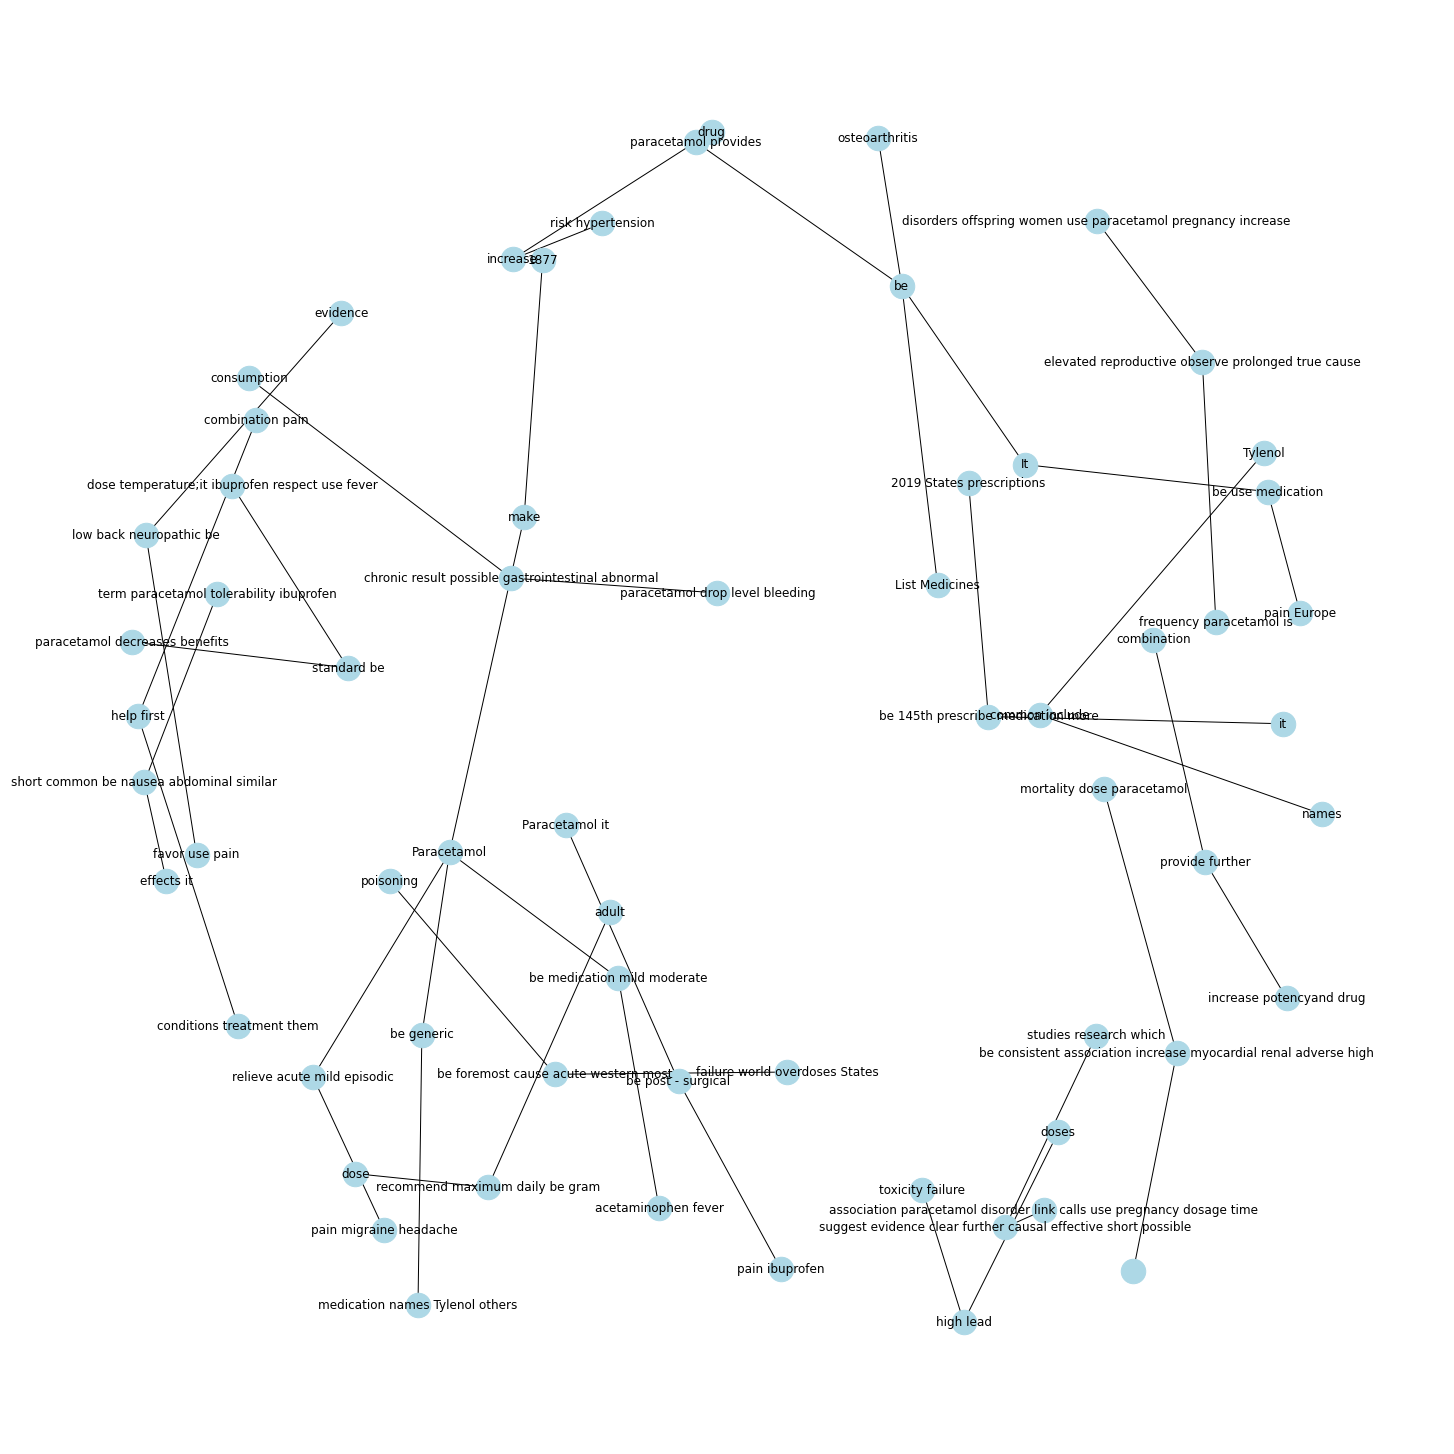

In [22]:
    printGraph(triples)